In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
movies = pd.read_csv('datasets/rotten_tomatoes_movies.csv')
reviews = pd.read_csv('datasets/rotten_tomatoes_movie_reviews.csv')


In [32]:

# Display basic information
print(movies.info())
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

In [33]:
reviews

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
...,...,...,...,...,...,...,...,...,...,...,...
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...


In [34]:
import numpy as np

def normalize_score(score):
    try:
        if isinstance(score, str):
            if '/' in score:  # Handle scores like '8/10'
                score = score.strip("'")  # Remove single quotes if present
                value, max_value = map(float, score.split('/'))
                if max_value == 0:
                    raise ValueError("max_value cannot be zero")
                return (value / max_value) * 10
            elif score.replace('.', '').isdigit():  # Handle numeric values with or without decimals
                return float(score)
            elif score.replace('.', '').replace('/', '').isdigit():  # Handle fractions
                score = score.strip("'")  # Remove single quotes if present
                value, max_value = map(float, score.split('/'))
                if max_value == 0:
                    raise ValueError("max_value cannot be zero")
                return (value / max_value) * 10
            else:  # Handle other formats
                grade_to_score = {'A+': 10, 'A': 9, 'A-': 8, 'B+': 7, 'B': 6, 'B-': 5, 'C+': 4, 'C': 3, 'C-': 2, 'D+': 1, 'D': 1, 'D-': 1}
                return grade_to_score.get(score.upper(), np.nan)
        elif isinstance(score, (int, float)):
            return score
        else:
            return np.nan
    except (ValueError, AttributeError, ZeroDivisionError) as e:
        print(f"Error processing score: {score} - {e}")
        return np.nan



In [35]:

# Apply the normalization
reviews['normalizedScore'] = reviews['originalScore'].apply(normalize_score)

# Remove NaN values
reviews_cleaned = reviews.dropna(subset=['normalizedScore'])

Error processing score: ***1/2 - could not convert string to float: '***1'
Error processing score: 2. 5 / 5 - could not convert string to float: '2. 5 '
Error processing score: 0/0 - max_value cannot be zero
Error processing score: 2.1/2` - could not convert string to float: '2`'
Error processing score: 1.5.4 - could not convert string to float: '1.5.4'
Error processing score: 4/5 stars - could not convert string to float: '5 stars'
Error processing score: 4.5.5 - could not convert string to float: '4.5.5'
Error processing score: 3/0 - max_value cannot be zero
Error processing score: 3 1/2 stars - could not convert string to float: '3 1'
Error processing score: 2 1/2 stars - could not convert string to float: '2 1'
Error processing score: 1/2 star - could not convert string to float: '2 star'
Error processing score: 4/5 stars - could not convert string to float: '5 stars'
Error processing score: 2.5.5 - could not convert string to float: '2.5.5'
Error processing score: 3.5.4 - could no

In [36]:
reviews = reviews_cleaned

In [37]:
reviews.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,normalizedScore
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...,8.75
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...,2.00
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...,5.00
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...,8.00
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...,7.00


In [38]:
reviews.shape

(1004642, 12)

In [39]:


# Check for missing values
print(movies.isnull().sum())
print(reviews.isnull().sum())


id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64
id                      0
reviewId                0
creationDate            0
criticName              0
isTopCritic             0
originalScore           0
reviewState             0
publicatioName          0
reviewText          68619
scoreSentiment          0
reviewUrl          163070
normalizedScore         0
dtype: int64


In [40]:
movies.drop(columns=['rating', 'ratingContents', 'boxOffice', 'distributor', 'soundMix'], inplace=True)
print(movies.isnull().sum())

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
dtype: int64


In [41]:
movies['title'].fillna('Unknown', inplace=True)
movies['audienceScore'].fillna(movies['audienceScore'].median(), inplace=True)
movies['tomatoMeter'].fillna(movies['tomatoMeter'].median(), inplace=True)
movies['releaseDateTheaters'].fillna(movies['releaseDateTheaters'].mode()[0], inplace=True)
movies['releaseDateStreaming'].fillna(movies['releaseDateStreaming'].mode()[0], inplace=True)
movies['runtimeMinutes'].fillna(movies['runtimeMinutes'].median(), inplace=True)
movies['genre'].fillna('Unknown', inplace=True)
movies['originalLanguage'].fillna('Unknown', inplace=True)
movies['director'].fillna('Unknown', inplace=True)
movies['writer'].fillna('Unknown', inplace=True)

In [42]:
print(movies.isnull().sum())

id                      0
title                   0
audienceScore           0
tomatoMeter             0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
writer                  0
dtype: int64


In [43]:
movies

,id,title,audienceScore,tomatoMeter,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer
0,space-zombie-bingo,Space Zombie Bingo!,50.0,73.0,2018-09-14,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta"
1,the_green_grass,The Green Grass,57.0,73.0,2018-09-14,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards
2,love_lies,"Love, Lies",43.0,73.0,2018-09-14,2017-05-22,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin"
3,the_sore_losers_1997,Sore Losers,60.0,73.0,2018-09-14,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy
4,dinosaur_island_2002,Dinosaur Island,70.0,73.0,2018-09-14,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy
...,...,...,...,...,...,...,...,...,...,...,...
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,73.0,2002-08-27,2017-05-22,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,57.0,73.0,2018-09-14,2017-05-22,99.0,Drama,English,Andrew Behringer,Erika Heidewald
143255,the-human-body,The Human Body,71.0,89.0,2018-09-14,2017-05-22,43.0,Documentary,English,Peter Georgi,Richard Dale
143256,flying_fists,Flying Fists,57.0,73.0,2018-09-14,2006-11-21,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey"


In [44]:
reviews.drop(columns=['originalScore', 'reviewText', 'reviewUrl'], inplace=True)


C:\Users\vishn\AppData\Local\Temp\ipykernel_30356\2134284064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.drop(columns=['originalScore', 'reviewText', 'reviewUrl'], inplace=True)


In [45]:
print(reviews.isnull().sum())

id                 0
reviewId           0
creationDate       0
criticName         0
isTopCritic        0
reviewState        0
publicatioName     0
scoreSentiment     0
normalizedScore    0
dtype: int64


In [46]:

# Convert dates with multiple formats and coerce errors
movies['releaseDateTheaters'] = pd.to_datetime(movies['releaseDateTheaters'], errors='coerce')
movies['releaseDateStreaming'] = pd.to_datetime(movies['releaseDateStreaming'], errors='coerce')



# Convert dates to datetime
movies['releaseDateTheaters'] = pd.to_datetime(movies['releaseDateTheaters'])
movies['releaseDateStreaming'] = pd.to_datetime(movies['releaseDateStreaming'])
reviews['creationDate'] = pd.to_datetime(reviews['creationDate'])


C:\Users\vishn\AppData\Local\Temp\ipykernel_30356\3770022209.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['creationDate'] = pd.to_datetime(reviews['creationDate'])


In [47]:

# Descriptive statistics
print(movies.describe())
print(reviews.describe())


       audienceScore    tomatoMeter            releaseDateTheaters  \
count  143258.000000  143258.000000                         143258   
mean       56.322509      71.290364  2013-09-15 05:31:25.666420224   
min         0.000000       0.000000            1902-10-04 00:00:00   
25%        57.000000      73.000000            2018-09-14 00:00:00   
50%        57.000000      73.000000            2018-09-14 00:00:00   
75%        58.000000      73.000000            2018-09-14 00:00:00   
max       100.000000     100.000000            2032-04-21 00:00:00   
std        17.569599      13.969153                            NaN   

                releaseDateStreaming  runtimeMinutes  
count                         143257   143258.000000  
mean   2015-10-11 14:21:50.813433088       93.543669  
min              1928-12-18 00:00:00        1.000000  
25%              2016-05-23 00:00:00       85.000000  
50%              2017-05-22 00:00:00       92.000000  
75%              2017-05-22 00:00:00   

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


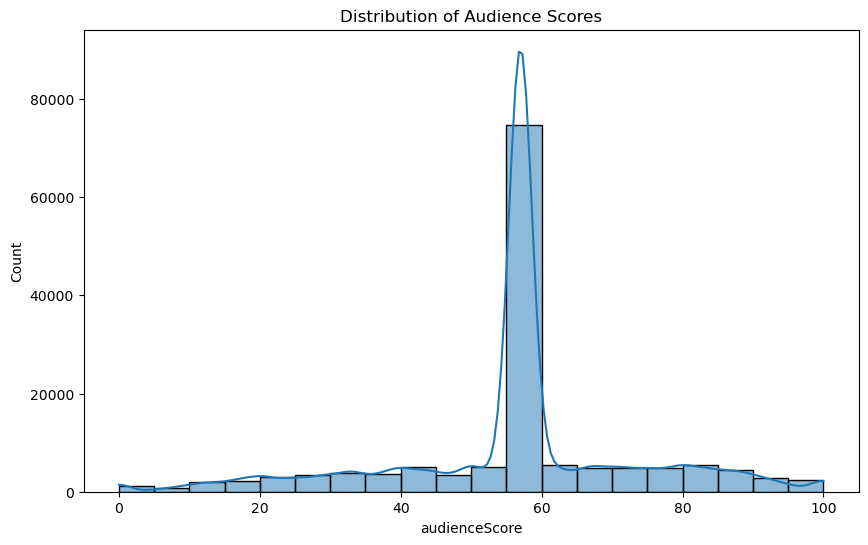

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


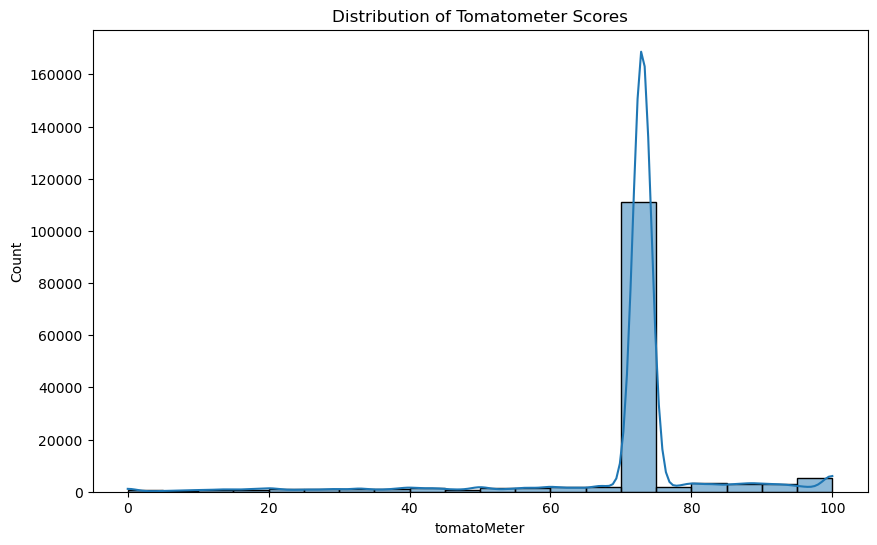

In [48]:

# Visualization of distributions
plt.figure(figsize=(10, 6))
sns.histplot(movies['audienceScore'].dropna(), bins=20, kde=True)
plt.title('Distribution of Audience Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(movies['tomatoMeter'].dropna(), bins=20, kde=True)
plt.title('Distribution of Tomatometer Scores')
plt.show()


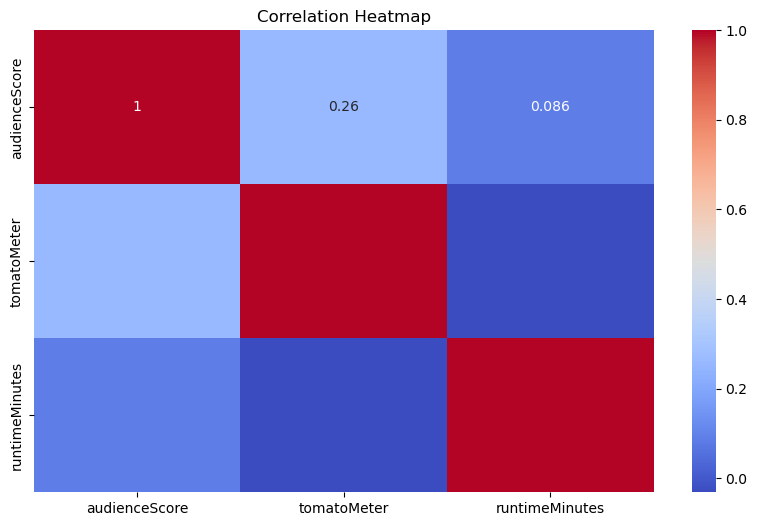

In [49]:
numeric_columns = movies.select_dtypes(include=['number']).columns

# Generate the correlation matrix
correlation_matrix = movies[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [50]:

# # Correlation heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(movies.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

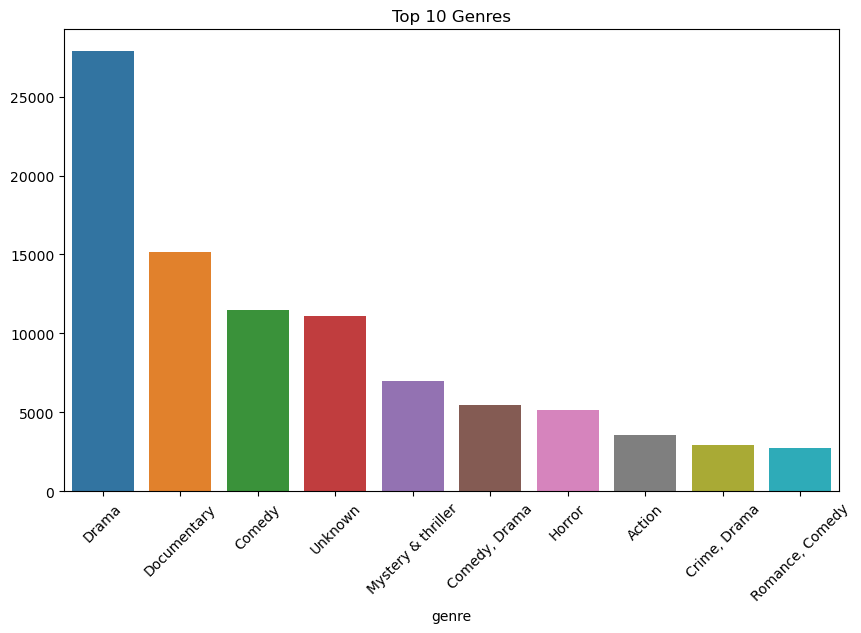

In [51]:


# Analysis of categorical features
genre_counts = movies['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.show()


In [52]:
# Prepare data for collaborative filtering using the Surprise library
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split

# reviews['userId'] = reviews['reviewId']


In [53]:
print(reviews.columns)


Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'reviewState', 'publicatioName', 'scoreSentiment', 'normalizedScore'],
      dtype='object')


In [77]:
reviews.tail(1000)

,id,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,scoreSentiment,normalizedScore
1443511,ambulance,102675351,2022-04-01,MaryAnn Johanson,False,rotten,Flick Filosopher,NEGATIVE,0.00
1443512,ambulance,102673881,2022-03-29,Nick Hasted,False,rotten,The Arts Desk,NEGATIVE,4.00
1443513,ambulance,102673096,2022-03-27,Edward Porter,False,fresh,Sunday Times (UK),POSITIVE,6.00
1443514,ambulance,102673095,2022-03-27,Wendy Ide,True,rotten,Observer (UK),NEGATIVE,4.00
1443515,ambulance,102673036,2022-03-26,Scott Campbell,False,fresh,We Got This Covered,POSITIVE,6.00
...,...,...,...,...,...,...,...,...,...
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,fresh,Raising Whasians,POSITIVE,7.00
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,fresh,Digital Spy,POSITIVE,8.00
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,fresh,Next Best Picture,POSITIVE,8.00
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,rotten,Slant Magazine,NEGATIVE,2.50


In [55]:
# Prepare data
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(reviews[['reviewId', 'id', 'normalizedScore']], reader)


In [56]:
# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

In [57]:
algo = SVD()

# Train the model
algo.fit(trainset)

# Evaluate the model
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.3814  4.7207  5.6217  4.3665  74363.271214876.472329743.3995
MAE (testset)     3.7728  3.7708  3.7746  3.7636  167.275636.4715 65.4021 
Fit time          16.49   12.78   13.60   14.63   14.55   14.41   1.24    
Test time         1.41    1.36    1.51    0.79    0.79    1.17    0.32    


{'test_rmse': array([4.38138650e+00, 4.72068216e+00, 5.62167099e+00, 4.36645600e+00,
        7.43632712e+04]),
 'test_mae': array([  3.77276975,   3.77081118,   3.77462888,   3.76362776,
        167.27563669]),
 'fit_time': (16.49494171142578,
  12.78185510635376,
  13.599727630615234,
  14.631518125534058,
  14.55471158027649),
 'test_time': (1.4114160537719727,
  1.3566539287567139,
  1.5149540901184082,
  0.7929315567016602,
  0.7888388633728027)}

In [67]:
reviews.tail

<bound method NDFrame.tail of                                         id   reviewId creationDate  \
0                                  beavers    1145982   2003-05-23   
1                               blood_mask    1636744   2007-06-02   
3        city_hunter_shinjuku_private_eyes    2558908   2019-02-14   
5                       dangerous_men_2015    2299284   2015-12-13   
6                       dangerous_men_2015    2295858   2015-11-22   
...                                    ...        ...          ...   
1444958              thor_love_and_thunder  102706151   2022-07-05   
1444959              thor_love_and_thunder  102706150   2022-07-05   
1444960              thor_love_and_thunder  102706149   2022-07-05   
1444961              thor_love_and_thunder  102706148   2022-07-05   
1444962              thor_love_and_thunder  102706147   2022-07-05   

              criticName  isTopCritic reviewState  \
0        Ivan M. Lincoln        False       fresh   
1          The Foywonde

In [80]:
# Generate recommendations for a user
user_id = '102673036'
top_n = 100

# Get a list of all movie ids
movie_ids = movies['id'].unique()

# Predict ratings for all movies
predictions = [algo.predict(user_id, movie_id) for movie_id in movie_ids]

# Sort by estimated rating
recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

# Display top 10 recommendations
for rec in recommendations:
    print(f"Movie ID: {rec.iid}, Estimated Rating: {rec.est}")

Movie ID: sobibor, Estimated Rating: 10
Movie ID: collateral_beauty, Estimated Rating: 10
Movie ID: the_accountant_2016, Estimated Rating: 10
Movie ID: we_used_to_know_each_other, Estimated Rating: 10
Movie ID: hell_or_high_water, Estimated Rating: 10
Movie ID: citizen_kane, Estimated Rating: 9.60728654837241
Movie ID: the_godfather, Estimated Rating: 9.50983473606444
Movie ID: singin_in_the_rain, Estimated Rating: 9.462061148443283
Movie ID: the_third_man, Estimated Rating: 9.440763306642616
Movie ID: sunset_boulevard, Estimated Rating: 9.372165012136433
Movie ID: godfather_part_ii, Estimated Rating: 9.371508562337333
Movie ID: seven_samurai_1956, Estimated Rating: 9.31755205807581
Movie ID: psycho, Estimated Rating: 9.313281405078127
Movie ID: 400_blows, Estimated Rating: 9.309555737970774
Movie ID: chinatown, Estimated Rating: 9.298776398589444
Movie ID: lawrence_of_arabia, Estimated Rating: 9.285795703045979
Movie ID: the_wizard_of_oz_1939, Estimated Rating: 9.279510819697983
Movie